# Our First ML Program

First, let's load pizzas and reservations from `pizza.txt`:

In [2]:
import numpy as np
X, Y = np.loadtxt("solutions/1. first ml project/pizza.txt", skiprows=1, unpack=True)

These are the reservations...

In [3]:
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

...and these are the pizzas:

In [4]:
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 29., 15., 15.,
       32., 37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27.,
       37., 17., 18., 23.])

Let's plot pizzas and reservations with Matplotlib:

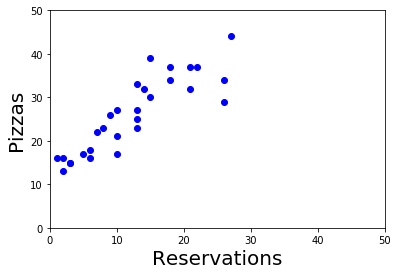

In [5]:
# This directive tells Jupyter to draw matplotlib plots inside the web page:
%matplotlib inline

import matplotlib.pyplot as plt
plt.xlabel("Reservations", fontsize=20)  # Print the X label
plt.ylabel("Pizzas", fontsize=20)        # Print the Y label
plt.axis([0, 50, 0, 50])                 # Both axes range from 0 to 50
plt.plot(X, Y, "bo")                     # Plot the data as blue circles (that's what "bo" stands for)
plt.show()                               # Visualize the diagram

We're about to approximate these data with linear regression–that is, with a line.

The equation of a line is `y = x * w + b`. Translate it to code, and you get the `predict()` function:

In [6]:
def predict(X, w, b):
    return X * w + b

Let's say that we already found a line that approximates the points, and this line has `w = 2.1` and `b = 7.3`. How many pizzas should we expect to sell if we got 10 reservations? Here's the answer:

In [7]:
predict(14, 1.2, 12)

28.8

Note that we can pass an entire NumPy array to `predict()` instead of a single number. NumPy automatically applies the multiplication and the sum inside `predict()` to all the elements in the array:

In [8]:
X = np.array([14, 5, 7])
predict(X, 1.2, 12)

array([28.8, 18. , 20.4])

Before we implement training, we have to define a loss function–a measure of how wrong a line is at approximating the dataset. We'll use the “mean squared error” formula for the loss. This function takes the dataset (`X` and `Y`) and a line (`w` and `b`):

In [9]:
def loss(X, Y, w, b): # mean square error
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2)

Let's try it out with the data from `pizza.txt` and two made-up values for the line's parameters:

In [11]:
X, Y = np.loadtxt("solutions/1. first ml project/pizza.txt", skiprows=1, unpack=True)

In [12]:
loss(X, Y, 1.2, 12)

23.778666666666677

Now here's the all-important `train()` function. It takes a dataset, and it returns a line that approximates it. It also takes a number of iterations and a learning rate (`lr`):

In [13]:
def train(X, Y, iterations, lr): # use input data and output value to train parameters that could result in similar prediction - X & Y, also Iterations and learning rate should also be included
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        else:
            return w, b

    raise Exception("Couldn't find a result within %d iterations" % iterations)

We have everything we need to find a line that approximates our `pizza.txt` dataset:

In [14]:
w, b = train(X, Y, 10000, 0.01)

.824687
Iteration  964 => Loss: 31.794587
Iteration  965 => Loss: 31.764687
Iteration  966 => Loss: 31.734987
Iteration  967 => Loss: 31.705487
Iteration  968 => Loss: 31.704247
Iteration  969 => Loss: 31.672413
Iteration  970 => Loss: 31.640780
Iteration  971 => Loss: 31.609347
Iteration  972 => Loss: 31.578113
Iteration  973 => Loss: 31.547080
Iteration  974 => Loss: 31.516247
Iteration  975 => Loss: 31.485613
Iteration  976 => Loss: 31.455180
Iteration  977 => Loss: 31.424947
Iteration  978 => Loss: 31.394913
Iteration  979 => Loss: 31.365080
Iteration  980 => Loss: 31.335447
Iteration  981 => Loss: 31.306013
Iteration  982 => Loss: 31.276780
Iteration  983 => Loss: 31.247747
Iteration  984 => Loss: 31.218913
Iteration  985 => Loss: 31.190280
Iteration  986 => Loss: 31.189733
Iteration  987 => Loss: 31.158767
Iteration  988 => Loss: 31.128000
Iteration  989 => Loss: 31.097433
Iteration  990 => Loss: 31.067067
Iteration  991 => Loss: 31.036900
Iteration  992 => Loss: 31.006933
Iterat

Done! Here are the line's parameters:

In [15]:
w

1.1000000000000008

In [16]:
b

12.929999999999769

Here is the line visualized over the examples:

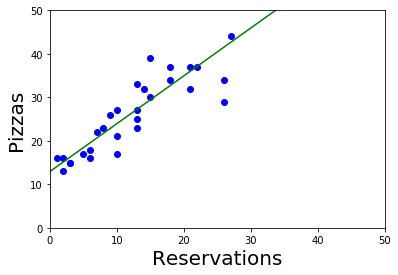

In [17]:
# Plot the examples like we did before:
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 50, 0, 50])
plt.plot(X, Y, "bo")

# Plot the line:
plt.plot([0, 50], [b, predict(50, w, b)], color="g")

# Visualize the diagram:
plt.show()

Finally, let's use this model to predict how many pizzas we're going to sell if we got 42 reservations:

In [18]:
reservations = 42
predict(reservations, w, b)

59.1299999999998

So we should prepare enough dough for about 60 pizzas. We just built a system that learns!